# Geometric Transformations

In [2]:
import itk
from itkwidgets import view
import numpy as np
import matplotlib.pyplot as plt

### Flip Image Filter

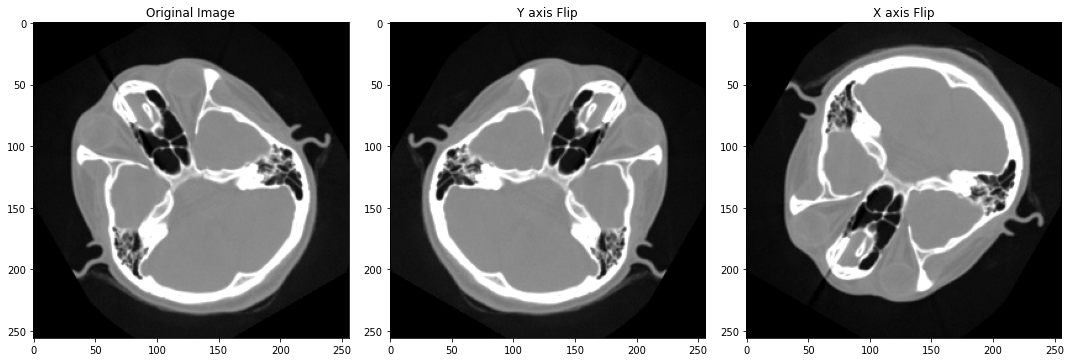

In [3]:

input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_image_path)

InputIm = reader.GetOutput()


FlipImageFilterType = itk.FlipImageFilter[ImageType]
flip_image_filter = FlipImageFilterType.New()
flip_image_filter.SetInput(InputIm)
flip_axes = [True,False]  # Example: Flip along the x-axis
flip_image_filter.SetFlipAxes(flip_axes)  
flip_image_filter.Update()
flipped_image = flip_image_filter.GetOutput()


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(InputIm, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(flipped_image, cmap='gray')
axes[1].set_title(f'Y axis Flip')

flip_axes = [False,True] 
flip_image_filter.SetFlipAxes(flip_axes)  
flip_image_filter.Update()
flipped_image = flip_image_filter.GetOutput()

axes[2].imshow(flipped_image, cmap='gray')
axes[2].set_title(f'X axis Flip')

plt.tight_layout()
plt.show()

### Resample Image Filter

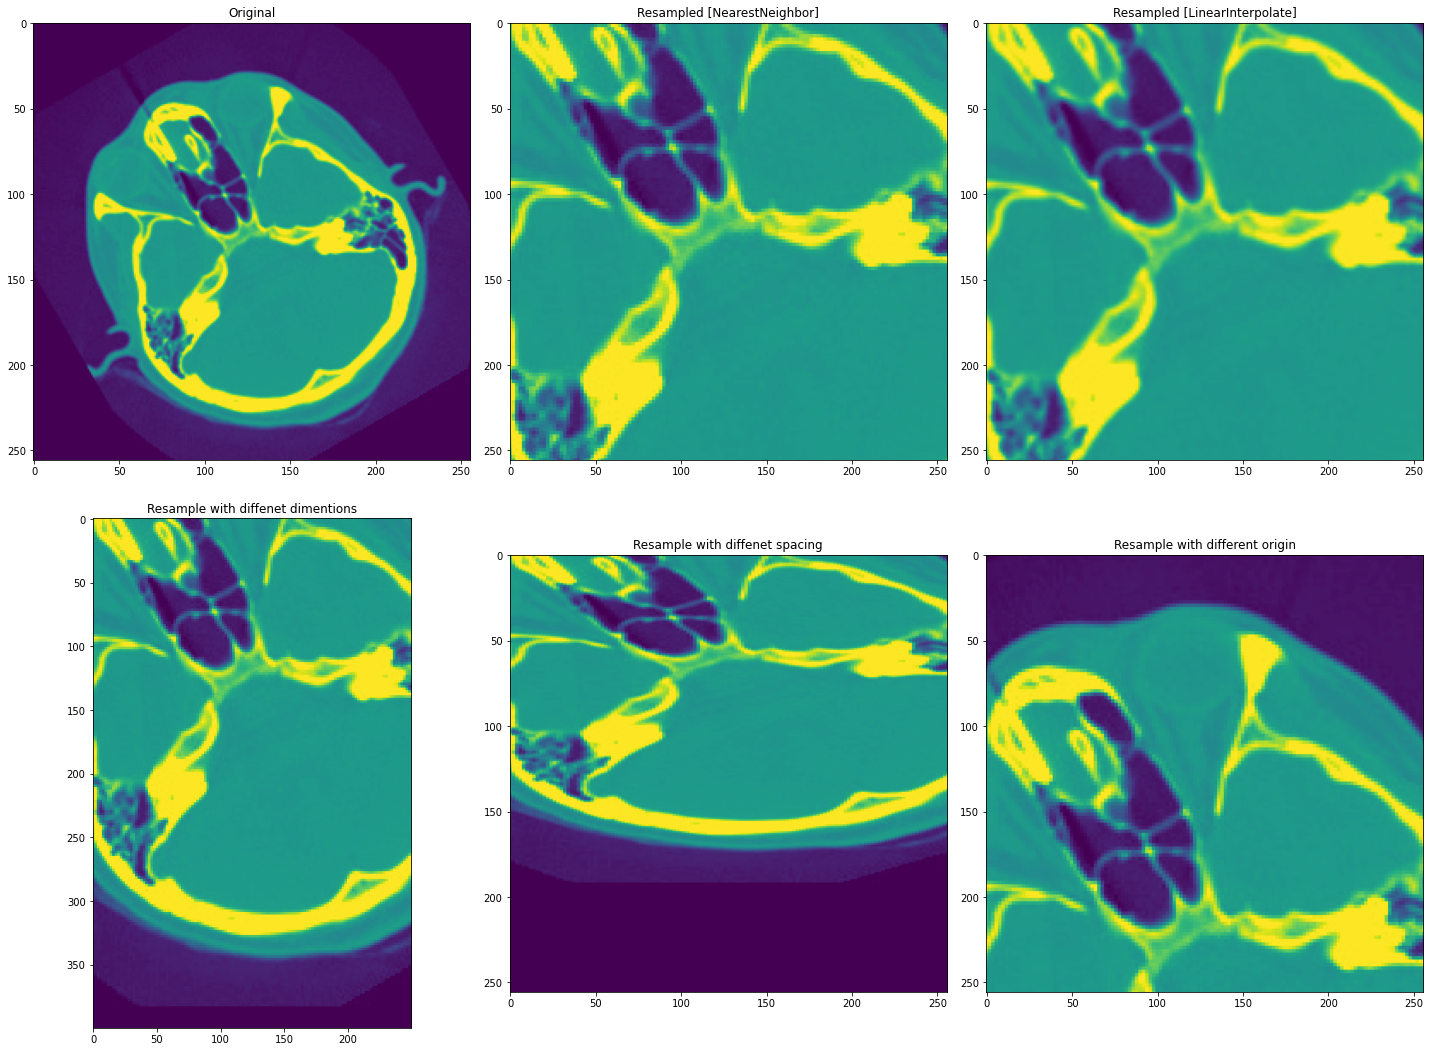

In [4]:


input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_image_path)
InputIm = reader.GetOutput()


scale =0.5
input_size = itk.size(InputIm)
input_spacing = itk.spacing(InputIm)
input_origin = itk.origin(InputIm)

output_size = input_size
output_spacing = input_spacing
output_origin = input_origin


scale_transform = itk.ScaleTransform[itk.D, Dimension].New()
scale_transform_parameters = scale_transform.GetParameters()


scale_transform_parameters[0] = scale
scale_transform_parameters[1] = scale

scale_transform_center = [float(int(s / 2)) for s in input_size]
scale_transform.SetParameters(scale_transform_parameters)
scale_transform.SetCenter(scale_transform_center)

# help(scale_transform)

interpolator0 = itk.NearestNeighborInterpolateImageFunction.New(InputIm)
interpolator1 = itk.LinearInterpolateImageFunction.New(InputIm)

resampled0 = itk.resample_image_filter(
    InputIm,
    transform=scale_transform,
    interpolator=interpolator0,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)

resampled1 = itk.resample_image_filter(
    InputIm,
    transform=scale_transform,
    interpolator=interpolator1,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin
)

resampled2 = itk.resample_image_filter(
    InputIm,
    transform=scale_transform,
    interpolator=interpolator0,
    size=[250,400],
    output_spacing=output_spacing,
    output_origin=output_origin
)

resampled3 = itk.resample_image_filter(
    InputIm,
    transform=scale_transform,
    interpolator=interpolator0,
    size=output_size,
    output_spacing=[1.0,2.0],
    output_origin=output_origin,
)

resampled4 = itk.resample_image_filter(
    InputIm,
    transform=scale_transform,
    interpolator=interpolator0,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=[0,-100]
)

fig,ax = plt.subplots(2,3,figsize= (20,15))

ax[0][0].imshow(InputIm)
ax[0][0].set_title('Original')

ax[0][1].imshow(resampled0)
ax[0][1].set_title('Resampled [NearestNeighbor]')

ax[0][2].imshow(resampled1)
ax[0][2].set_title('Resampled [LinearInterpolate]')

ax[1][0].imshow(resampled2)
ax[1][0].set_title('Resample with diffenet dimentions')

ax[1][1].imshow(resampled3)
ax[1][1].set_title('Resample with diffenet spacing')

ax[1][2].imshow(resampled4)
ax[1][2].set_title('Resample with different origin')


plt.tight_layout()
plt.show()

### Scaling trasform

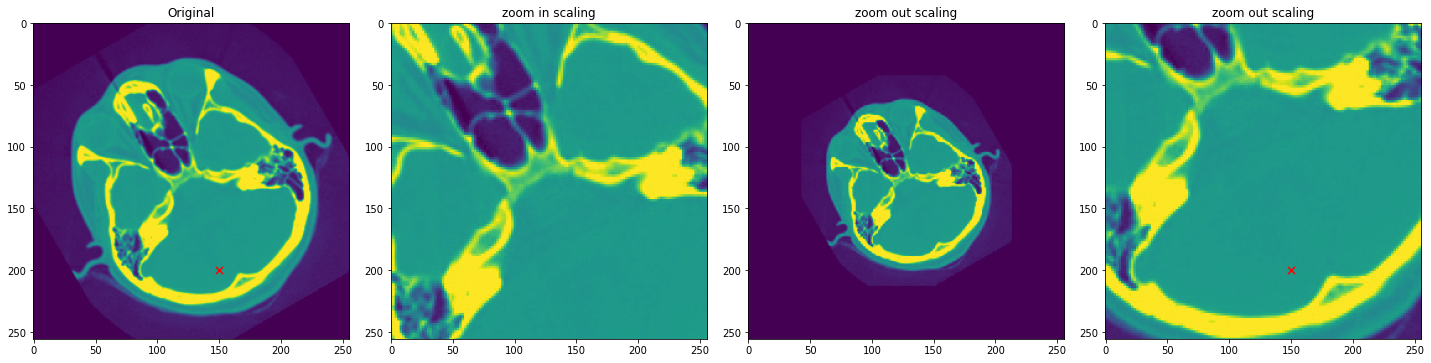

In [12]:

input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_image_path)
InputIm = reader.GetOutput()


scale =0.5
input_size = itk.size(InputIm)
input_spacing = itk.spacing(InputIm)
input_origin = itk.origin(InputIm)

output_size = input_size
output_spacing = input_spacing
output_origin = input_origin


scale_transform = itk.ScaleTransform[itk.D, Dimension].New()
scale_transform_parameters = scale_transform.GetParameters()

scale_transform_parameters[0] = scale
scale_transform_parameters[1] = scale

scale_transform_center = [float(int(s / 2)) for s in input_size]
scale_transform.SetParameters(scale_transform_parameters)
scale_transform.SetCenter(scale_transform_center)

# help(scale_transform)

interpolator0 = itk.NearestNeighborInterpolateImageFunction.New(InputIm)

resampled0 = itk.resample_image_filter(
    InputIm,
    transform=scale_transform,
    interpolator=interpolator0,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)

fig,ax = plt.subplots(1,4,figsize= (20,15))

ax[0].imshow(InputIm)
ax[0].set_title('Original')
ax[0].scatter(150, 200, c='red', s=50, marker='x')

ax[1].imshow(resampled0)
ax[1].set_title('zoom in scaling')

scale =1.5

scale_transform = itk.ScaleTransform[itk.D, Dimension].New()
scale_transform_parameters = scale_transform.GetParameters()

scale_transform_parameters[0] = scale
scale_transform_parameters[1] = scale

scale_transform_center = [float(int(s / 2)) for s in input_size]
scale_transform.SetParameters(scale_transform_parameters)
scale_transform.SetCenter(scale_transform_center)

resampled1 = itk.resample_image_filter(
    InputIm,
    transform=scale_transform,
    interpolator=interpolator0,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)

ax[2].set_title('zoom out scaling')
ax[2].imshow(resampled1)

scale =0.5

scale_transform = itk.ScaleTransform[itk.D, Dimension].New()
scale_transform_parameters = scale_transform.GetParameters()

scale_transform_parameters[0] = scale
scale_transform_parameters[1] = scale

scale_transform_center = [150,200]
scale_transform.SetParameters(scale_transform_parameters)
scale_transform.SetCenter(scale_transform_center)

resampled1 = itk.resample_image_filter(
    InputIm,
    transform=scale_transform,
    interpolator=interpolator0,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)

ax[3].set_title('zoom out scaling')
ax[3].imshow(resampled1)
ax[3].scatter(150, 200, c='red', s=50, marker='x')

plt.tight_layout()
plt.show()


But if we change the resamping origin this fix point will be different

### Affine Transform

y = Ax+b defines an affine transformation. A is a constant n x n matrix and b is a constant n-vector

This class provides several methods for setting the matrix and vector defining the transform. To support the registration framework, the transform parameters can also be set as an Array<double> of size (VDimension + 1) * VDimension using method SetParameters(). The first (VDimension x VDimension) parameters defines the matrix in row-major order (where the column index varies the fastest). The last VDimension parameters defines the translation in each dimensions.

![image](1.jpg)

itkSize2 ([256, 256])
itkVectorD2 ([1, 1])
itkPointD2 ([0, 0])


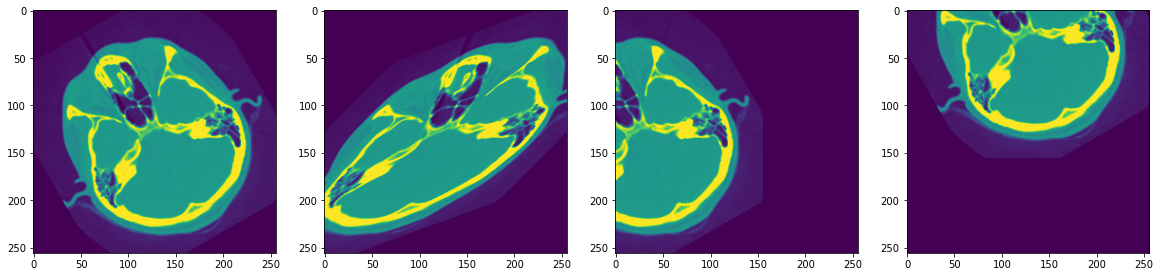

In [18]:
import itk
from itkwidgets import view
import numpy as np

import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,4,figsize= (20,5))

scale =0.5

input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_image_path)
InputIm = reader.GetOutput()

ax[0].imshow(InputIm)

input_size = itk.size(InputIm)
input_spacing = itk.spacing(InputIm)
input_origin = itk.origin(InputIm)

print(input_size)
print(input_spacing)
print(input_origin)


output_size = input_size

output_spacing = input_spacing
output_origin = input_origin


affine_Transform = itk.AffineTransform[itk.D, Dimension].New()
affine_Transform_parameters = affine_Transform.GetParameters()

affine_Transform_parameters[0] = 1  # m1
affine_Transform_parameters[1] = 1    # m2
affine_Transform_parameters[2] = 0    # m3
affine_Transform_parameters[3] = 1    # m4
affine_Transform_parameters[4] = 0    # t1
affine_Transform_parameters[5] = 0    # t2


affine_Transform_center = [float(int(s / 2)) for s in input_size]
affine_Transform.SetParameters(affine_Transform_parameters)
affine_Transform.SetCenter(affine_Transform_center)

interpolator = itk.NearestNeighborInterpolateImageFunction.New(InputIm)

resampled0 = itk.resample_image_filter(
    InputIm,
    transform=affine_Transform,
    interpolator=interpolator,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)


affine_Transform_parameters[0] = 1  # m1
affine_Transform_parameters[1] = 0    # m2
affine_Transform_parameters[2] = 0    # m3
affine_Transform_parameters[3] = 1    # m4
affine_Transform_parameters[4] = 100    # t1
affine_Transform_parameters[5] = 0    # t2

affine_Transform.SetParameters(affine_Transform_parameters)
resampled1 = itk.resample_image_filter(
    InputIm,
    transform=affine_Transform,
    interpolator=interpolator,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)

affine_Transform_parameters[0] = 1  # m1
affine_Transform_parameters[1] = 0    # m2
affine_Transform_parameters[2] = 0    # m3
affine_Transform_parameters[3] = 1    # m4
affine_Transform_parameters[4] = 0    # t1
affine_Transform_parameters[5] = 100    # t2

affine_Transform.SetParameters(affine_Transform_parameters)
resampled2 = itk.resample_image_filter(
    InputIm,
    transform=affine_Transform,
    interpolator=interpolator,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)

ax[1].imshow(resampled0)
ax[2].imshow(resampled1)
ax[3].imshow(resampled2)



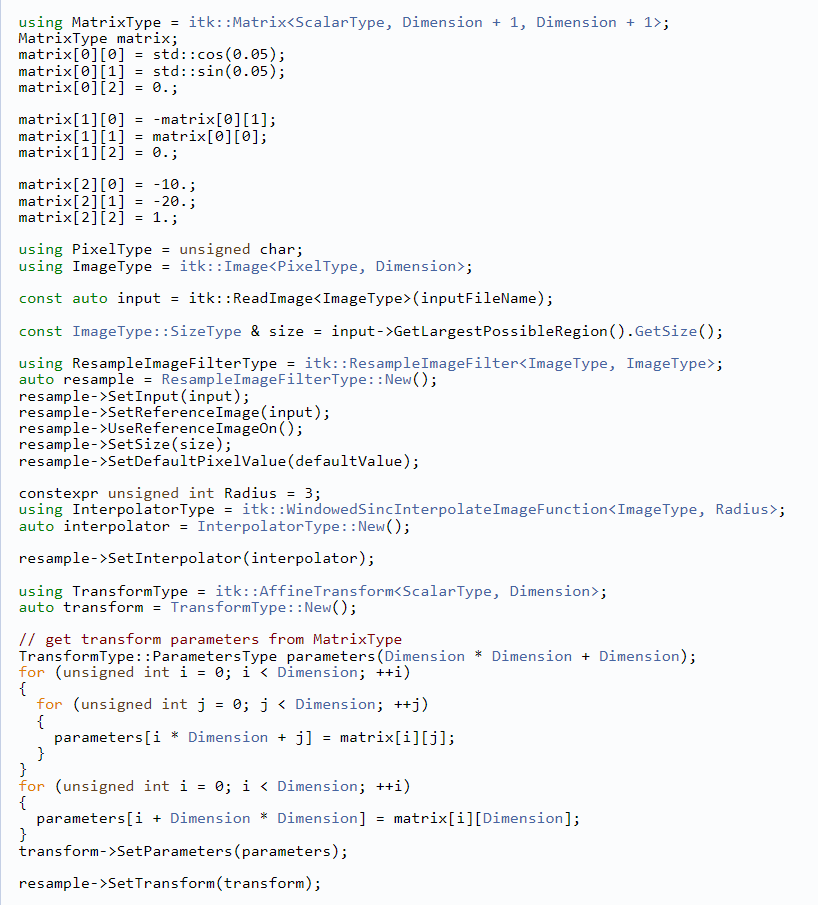

https://itk.org/Doxygen/html/SphinxExamples_2src_2Core_2Transform_2ApplyAffineTransformFromHomogeneousMatrixAndResample_2Code_8cxx-example.html#_a8

### Rotation and traslation with affine 

itkSize2 ([256, 256])
itkVectorD2 ([1, 1])
itkPointD2 ([0, 0])


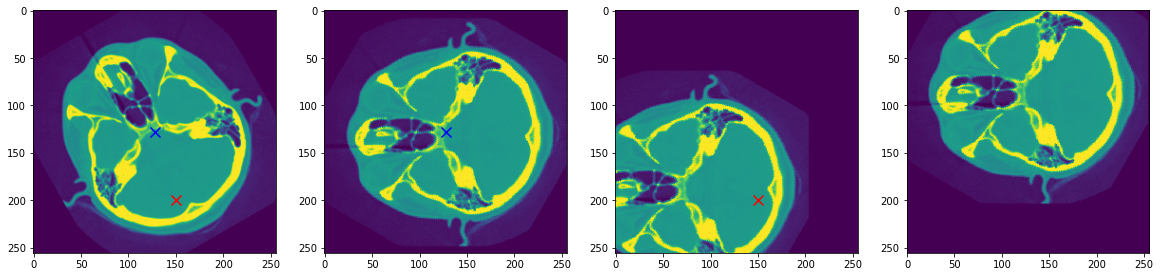

In [3]:
import itk
from itkwidgets import view
import numpy as np
import math

import matplotlib.pyplot as plt



scale =0.5

input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_image_path)
InputIm = reader.GetOutput()



input_size = itk.size(InputIm)
input_spacing = itk.spacing(InputIm)
input_origin = itk.origin(InputIm)

print(input_size)
print(input_spacing)
print(input_origin)


output_size = input_size

output_spacing = input_spacing
output_origin = input_origin


affine_Transform = itk.AffineTransform[itk.D, Dimension].New()
affine_Transform_center = [float(int(s / 2)) for s in input_size]
affine_Transform.SetCenter(affine_Transform_center)
affine_Transform.Rotate2D(math.pi/3, True)
#affine_Transform.Rotate3D()

interpolator = itk.NearestNeighborInterpolateImageFunction.New(InputIm)

resampled0 = itk.resample_image_filter(
    InputIm,
    transform=affine_Transform,
    interpolator=interpolator,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)


affine_Transform_center = [150,200]
affine_Transform.SetCenter(affine_Transform_center)


resampled1 = itk.resample_image_filter(
    InputIm,
    transform=affine_Transform,
    interpolator=interpolator,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)


affine_Transform.Translate([-50,100],True) # vector - translation, bool - translation is precompsed?

resampled2 = itk.resample_image_filter(
    InputIm,
    transform=affine_Transform,
    interpolator=interpolator,
    size=output_size,
    output_spacing=output_spacing,
    output_origin=output_origin,
)

fig,ax = plt.subplots(1,4,figsize= (20,5))

ax[0].imshow(InputIm)
ax[0].scatter(150, 200, c='red', s=100, marker='x')
ax[0].scatter(128, 128, c='blue', s=100, marker='x')

ax[1].imshow(resampled0)
ax[1].scatter(128, 128, c='blue', s=100, marker='x')

ax[2].imshow(resampled1)
ax[2].scatter(150, 200, c='red', s=100, marker='x')


ax[3].imshow(resampled2)



## WarpImageFilter

![image](2.jpg)

In [26]:
import SimpleITK as sitk
import numpy as np

# Define the size and spacing of the displacement field
size = (256, 256)  # Size of the field
spacing = (1.5, 1.8)  # Spacing between points in the field

# Create an ITK image to store the displacement field
displacement_field_image = sitk.Image(size, sitk.sitkVectorFloat64)
displacement_field_image.CopyInformation(sitk.Image(size, sitk.sitkVectorFloat64))

# Fill the displacement field with a simple pattern (e.g., a sinusoidal pattern)
for y in range(size[1]):
    for x in range(size[0]):
        displacement = [-100.0 * x*x /(size[0]**2) , -100.0 * y*y / (size[1]**2)]  # Adjust this to create the desired displacement pattern
        displacement_field_image[x, y] = displacement

# Save the displacement field to a file (optional)
sitk.WriteImage(displacement_field_image, "displacement.mha")


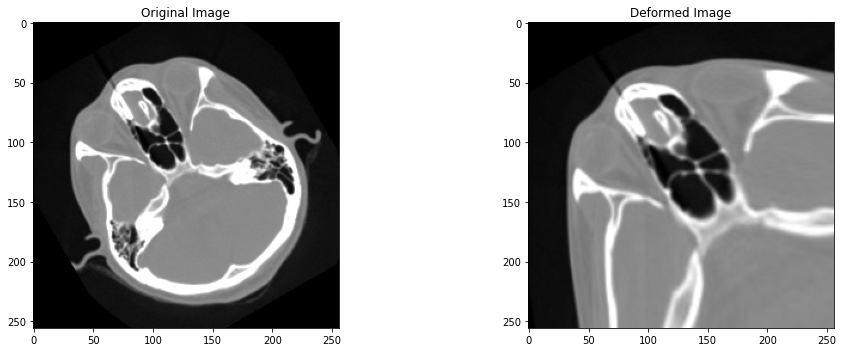

In [27]:
# Load the original image
input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_image_path)
input_image = reader.GetOutput()

input_array = itk.array_from_image(input_image)

dimension = 2
PixelType = itk.F


# Deformation field
Dimension = 2
displacement_field = "displacement.mha"
VectorComponentType = itk.F
VectorPixelType = itk.Vector[VectorComponentType, Dimension]
DisplacementFieldType = itk.Image[VectorPixelType, Dimension]

fieldReader = itk.ImageFileReader[DisplacementFieldType].New()
fieldReader.SetFileName(displacement_field)
fieldReader.Update()

deformationField = fieldReader.GetOutput()
warpFilter = itk.WarpImageFilter[ImageType, ImageType, DisplacementFieldType].New()
interpolator = itk.LinearInterpolateImageFunction[ImageType, itk.D].New()

warpFilter.SetInterpolator(interpolator)

warpFilter.SetOutputSpacing(deformationField.GetSpacing())
warpFilter.SetOutputOrigin(deformationField.GetOrigin())
warpFilter.SetOutputDirection(deformationField.GetDirection())

warpFilter.SetDisplacementField(deformationField)

warpFilter.SetInput(input_image)

# Create a figure and axis for subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Display the original image
axes[0].imshow(input_array, cmap='gray')
axes[0].set_title('Original Image')

# Warp and display the deformed image
deformed_array = itk.array_from_image(warpFilter.GetOutput())
axes[1].imshow(deformed_array, cmap='gray')
axes[1].set_title('Deformed Image')

# Show the subplots
plt.tight_layout()
plt.show()
